In [1]:
import os
import re

In [5]:
data = {"transcripts":"../transcript_raw_text/preprocessed",
        "minutes":"../minutes_raw_text/preprocessed",
        "statements":"../statement_raw_text/preprocessed",
        "bluebooks":"../bluebook_raw_text/preprocessed",
        "agendas":"../agenda_raw_text/preprocessed",
        "news":"../newsarticles_raw_text/preprocessed",}

In [6]:
# how many data points do we have?
for k,v in data.items():
    print("{}\t{}".format(len(os.listdir(v)),k))


412	transcripts
475	minutes
141	statements
425	bluebooks
467	agendas
380	news


In [11]:
# how long (in words / sentences) is each data point on average (by type)?
for k,v in data.items():
    wfmin, wfmax, wcum, total = 100000.0, 0.0, 0.0, 0.0
    sfmin, sfmax, scum = 100000.0, 0.0, 0.0
    for ff in os.listdir(v):
        with open(os.path.join(v,ff), 'r') as raw:
            content = raw.read()
            this_len = len(content.split("\n"))
            wfmax = max(this_len, wfmax)
            wfmin = min(this_len, wfmin)
            total +=1
            wcum += this_len
            nsents = len(content.split("\n\n"))
            sfmax = max(nsents, sfmax)
            sfmin = min(nsents, sfmin)
            scum += nsents
    print("#words / {}   \t min: {} \t max: {}\t avg: {}".format(k, wfmin, wfmax, round(wcum/total,1)))
    print("#sents / {}   \t min: {} \t max: {}\t avg: {}\n".format(k, sfmin, sfmax, round(scum/total,1)))
        

#words / transcripts   	 min: 412 	 max: 111986	 avg: 35339.5
#sents / transcripts   	 min: 17 	 max: 7533	 avg: 2023.1

#words / minutes   	 min: 246 	 max: 36215	 avg: 5316.7
#sents / minutes   	 min: 9 	 max: 1128	 avg: 169.5

#words / statements   	 min: 60 	 max: 1020	 avg: 364.1
#sents / statements   	 min: 4 	 max: 28	 avg: 13.8

#words / bluebooks   	 min: 3203 	 max: 144531	 avg: 7047.8
#sents / bluebooks   	 min: 1 	 max: 1118	 avg: 339.1

#words / agendas   	 min: 35 	 max: 1126	 avg: 274.6
#sents / agendas   	 min: 3 	 max: 67	 avg: 24.7

#words / news   	 min: 181 	 max: 10549	 avg: 1696.8
#sents / news   	 min: 10 	 max: 541	 avg: 80.6



In [12]:
#for which dates do we have all modalities?
datelists = []
for k,v in data.items():
    datelists.append(set(os.listdir(v)))

intersection = set.intersection(*datelists)
print(sorted(intersection))
print(len(intersection))

[]
0


In [161]:
# Who speaks most (based on the transcripts)
speakerlists = {}
n_most_frequent = 50

speaker_regex = re.compile('\n\n[A-Z\.]+ [A-Z]+\. ')
raw_text_dir = os.path.dirname(data['transcripts']) # using raw text here

for meeting in os.listdir(raw_text_dir): 
    if os.path.isfile(os.path.join(raw_text_dir,meeting)):
        year = meeting.split('-')[0]
        if year not in speakerlists:
            speakerlists[year]={}
        transcript = open(os.path.join(raw_text_dir,meeting),'r').read()
        for match in re.findall(speaker_regex, transcript):
            match = match.strip()
            if match not in speakerlists[year]:
                speakerlists[year][match]=0
            speakerlists[year][match]+=1
for year in sorted(speakerlists.keys()):
    print("**{}** --> ".format(year), sorted([(v,k) for k,v in speakerlists[year].items()], reverse=True)[:n_most_frequent])
    

**1976** -->  [(1573, 'CHAIRMAN BURNS.'), (307, 'MR. PARTEE.'), (220, 'MR. GRAMLEY.'), (190, 'MR. COLDWELL.'), (184, 'MR. WALLICH.'), (158, 'MR. AXILROD.'), (141, 'MR. BROIDA.'), (106, 'MR. BLACK.'), (102, 'MR. JACKSON.'), (82, 'MR. WINN.'), (82, 'MR. HOLMES.'), (80, 'MR. BALLES.'), (79, 'MR. MAYO.'), (77, 'MR. BAUGHMAN.'), (73, 'MR. HOLLAND.'), (72, 'MR. MORRIS.'), (69, 'MR. EASTBURN.'), (68, 'MR. STERNLIGHT.'), (68, 'MR. MACLAURY.'), (36, 'MR. GARDNER.'), (33, 'MR. KIMBREL.'), (32, 'MR. GUFFEY.'), (31, 'MR. PARDEE.'), (27, 'MR. ZEISEL.'), (24, 'MR. ROOS.'), (23, 'MR. LILLY.'), (21, 'MR. KALCHBRENNER.'), (15, 'MS. GREENE.'), (6, 'MR. WILLIAMS.'), (6, 'MR. KICHLINE.'), (4, 'MR. REYNOLDS.'), (3, 'MR. TIMLEN.'), (3, 'MR. FOSSUM.'), (2, 'MR. COYNE.'), (1, 'MR. WILLES.'), (1, 'MR. VOLCKER.'), (1, 'MR. PAULUS.'), (1, 'MR. MORRRIS.'), (1, 'MR. MACCLAURY.'), (1, 'MR PARTEE.'), (1, 'MR MAYO.'), (1, 'CHNAIRMAN BURNS.')]
**1977** -->  [(1857, 'CHAIRMAN BURNS.'), (581, 'MR. PARTEE.'), (312, 'MR. 

In [167]:
# Which ORGANIZATIONS are talked about most (based on the transcripts); printed by year
# ----------------------------------------------------
# (you'll see that automatic entity-type tagging isn't great  -- a lot of the 'organizations' are really 'persons') 
# but it's better than nothing

orglists = {}
n_most_frequent = 50
in_org=False

for meeting in os.listdir(data['transcripts']):
    if os.path.isfile(os.path.join(data['transcripts'],meeting)):
        year = meeting.split('-')[0]
        if year not in orglists:
            orglists[year]={}
        with open(os.path.join(data['transcripts'],meeting),'r') as transcript:
            for line in transcript.readlines():
                if len(line.split("\t")) == 7:
                    if line.split("\t")[4] == 'ORG_B': # record beginning of new ORG
                        word = line.split('\t')[0]
                        if in_org:
                            if word not in orglists[year]:
                                orglists[year][word]=0
                            orglists[year][word]+=1
                            in_org=False
                            this_org=[]
                        this_org = [line.split("\t")[0]]
                        in_org = True
                    elif line.split("\t")[4] == 'ORG_I': # append to ORG
                        this_org.append(line.split("\t")[0])
                    elif in_org: # write ORG, once complete
                        org = ' '.join(this_org)
                        if org not in orglists[year]:
                            orglists[year][org]=0
                        orglists[year][org]+=1
                        in_org=False
                        this_org=[]
for year in sorted(orglists.keys()):
    print("**{}** --> ".format(year), sorted([(v,k) for k,v in orglists[year].items()], reverse=True)[:n_most_frequent])
    

**1976** -->  [(2391, 'MR'), (781, 'Committee'), (307, 'PARTEE'), (220, 'GRAMLEY'), (191, 'COLDWELL'), (183, 'WALLICH'), (168, '’s'), (159, 'AXILROD'), (142, 'BROIDA'), (137, 'Treasury'), (106, 'BLACK'), (103, 'JACKSON'), (83, 'HOLMES'), (82, 'WINN'), (81, 'BALLES'), (79, 'MAYO'), (73, 'HOLLAND'), (72, 'MORRIS'), (68, 'STERNLIGHT'), (68, 'MACLAURY'), (61, 'Congress'), (55, 'the Memorandum of Discussion'), (47, 'RPD'), (42, 'FOMC'), (39, 'Board'), (38, 'GARDNER'), (36, 'the Federal Reserve'), (35, 'the Federal Open Market Committee'), (34, 'Committee ’s'), (33, 'KIMBREL'), (32, 'GUFFEY'), (32, 'Board of Governors'), (27, 'the Board of Governors'), (26, 'Banks'), (24, 'ROOS'), (24, 'Desk'), (23, 'LILLY'), (22, 'Greenbook'), (19, 'Federal Reserve Bank'), (18, 'Federal Reserve'), (17, 'the District Court'), (17, 'the Court of Appeals'), (17, 'House'), (17, 'Board ’s'), (17, 'Bank'), (16, 'Senate'), (16, 'Federal Reserve Banks'), (16, 'BIS'), (16, 'Alternate'), (15, 'Telerate')]
**1977** --


# A simple topic model

In [30]:
# choose any subset out of ['transcripts', 'agendas', 'statements', 'minutes', 'bluebooks', 'news']
# word clouds and topics below will take this data type as input
datatypes = ['transcripts', 'agendas', 'statements', 'minutes', 'bluebooks', 'news']

# first, read all data as lemmas, and remove stopwords and punctuation
consider_pos = ['PROPN', 'VERB', 'NOUN', 'ADJ', 'ADV', 'ADP']
lda_input_by_decade = {}

for datatype in datatypes:
    for meeting in os.listdir(data[datatype]):
        document = []
        year = meeting.split('-')[0][:-1]+'0'
        if year not in lda_input_by_decade:
            lda_input_by_decade[year] = []
        for line in open(os.path.join(data[datatype],meeting),'r').readlines():
            if len(line.split("\t"))==7:
                line=line.strip("\n")
                if line.split("\t")[6]=="False" and line.split("\t")[2] in consider_pos and len(line.split("\t")[1]) > 5: #  not a stopword and not punctuation
                    document.append(line.split("\t")[1].lower()) # the lemma
        lda_input_by_decade[year].append(' '.join(document))
    
print(len(lda_input_by_decade))
print(lda_input_by_decade.keys())

7
dict_keys(['1980', '1970', '2000', '1990', '2010', '1960', 'all_bluebooks.ou0'])


1980


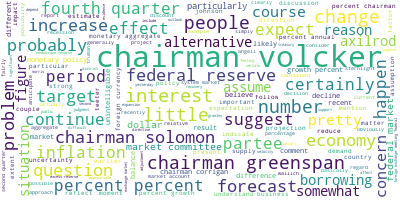

In [31]:
# first, a word cloud

#import sys
#!{sys.executable} -m pip install sklearn

from wordcloud import WordCloud
import matplotlib

decade = 1980
print(decade)
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(','.join(lda_input_by_decade[str(decade)]))
wordcloud.to_image()


1990


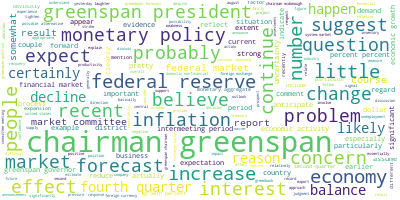

In [32]:
decade = decade+10
print(decade)
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(','.join(lda_input_by_decade[str(decade)]))
wordcloud.to_image()

2000


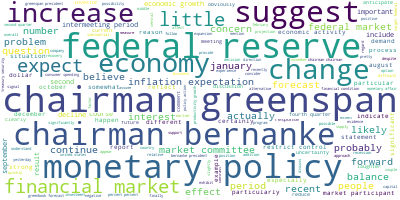

In [33]:
decade = decade+10
print(decade)
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(','.join(lda_input_by_decade[str(decade)]))
wordcloud.to_image()

2010


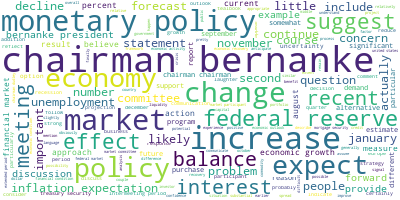

In [34]:
decade = decade+10
print(decade)
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(','.join(lda_input_by_decade[str(decade)]))
wordcloud.to_image()

In [35]:
# now, a topic model per decade

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
ntopics = 10
printwords = 20

print("\n\n******** 1980-2013 ********\n***************************\n\n")

all_docs = [doc for docs in lda_input_by_decade.values() for doc in docs ]

count_vectorizer = CountVectorizer()
lda_vectors = count_vectorizer.fit_transform(all_docs)

lda = LDA(n_components=ntopics, n_jobs=-1, max_iter=100, doc_topic_prior=0.001, topic_word_prior=0.01)
lda.fit(lda_vectors)

print_topics(lda, count_vectorizer, printwords)




******** 1980-2013 ********
***************************



Topic #0:
market reserve committee policy increase credit continue demand system change treasury recent pressure meeting federal balance condition monetary report payment

Topic #1:
chairman percent miller partee committee growth aggregate market wallich quarter increase question inflation little change projection figure comment policy federal

Topic #2:
reserve growth deposit market average period alternative credit aggregate demand percent change annual federal dollar adjust monetary borrowing interest treasury

Topic #3:
chairman question committee reserve market angell federal little governor people policy president problem interest dollar monetary unintelligible certainly pretty probably

Topic #4:
federal market committee meeting reserve foreign system currency operation account action governors transaction secretary policy manager report domestic messrs assistant

Topic #5:
chairman greenspan inflation growth percent f

In [36]:
# now, a topic model per decade

for decade in sorted(lda_input_by_decade.keys()):
    
    print("\n\n******** {} ********\n**********************\n\n".format(decade))

    count_vectorizer = CountVectorizer()
    lda_vectors = count_vectorizer.fit_transform(lda_input_by_decade[decade])


    lda = LDA(n_components=ntopics, n_jobs=-1, max_iter=100, topic_word_prior=0.01)
    lda.fit(lda_vectors)

    print_topics(lda, count_vectorizer, printwords)



******** 1960 ********
**********************



Topic #0:
saving mortgage projection reserve 10 brimmer liquidity committee defense project alternative decline period association institution francis increase construction arrangement interest

Topic #1:
zurich esstock escalator escape eschew esecially eserve especially essage essarily essays essence essential essentiality essentially essertial establish escalate established establishment

Topic #2:
market reserve committee increase policy continue credit demand change recent system federal treasury business expansion balance payment economic meeting monetary

Topic #3:
reserve deposit demand average market credit dollar adjust member federal change period weekly figure include private supply require treasury commercial

Topic #4:
federal market committee reserve system secretary meeting governors assistant foreign currency account unanimous messrs president authorize transaction chairman approve alternate

Topic #5:
zurich esstock es


Topic #0:
πt facetious extraordinary extrapolate extrapolation extreme extremely extremis extricate extruder exuberance exuberant faberman faberman2 faberman² facebook facial faithful facilitate facilities

Topic #1:
inflation chairman policy market percent president growth bernanke unemployment change economy increase economic meeting question expect committee forecast financial continue

Topic #2:
chairman bernanke market question president european central reserve funding dollar institution problem europe concern fiscal liquidity support fisher financial important

Topic #3:
πt facetious extraordinary extrapolate extrapolation extreme extremely extremis extricate extruder exuberance exuberant faberman faberman2 faberman² facebook facial faithful facilitate facilities

Topic #4:
committee inflation market economic federal continue remain policy participant increase security financial condition period monetary quarter reserve recent growth consumer

Topic #5:
market committee action 

ValueError: empty vocabulary; perhaps the documents only contain stop words